#### Group Members - Chirag Chandrashekar, Chris Alexander, Viveka Salinamakki


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Importing the Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error, r2_score, max_error, explained_variance_score

C:\Users\vivek\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\vivek\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\vivek\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
seasons_list = [
    '2004-2005',
    '2005-2006',
    '2006-2007',
    '2007-2008',
    '2008-2009',
    '2009-2010',
    '2010-2011',
    '2011-2012',
    '2012-2013',
    '2013-2014',
    '2014-2015',
    '2015-2016',
    '2016-2017',
    '2017-2018',
    '2018-2019',
    '2019-2020',
    '2020-2021',
    '2021-2022',
    '2022-2023',
    '2023-2024'
]

In [3]:
# for season in seasons_list:
pl_data_list = [pd.read_csv(f"..\Data\pl_stats_{season}.csv").assign(Season=season[0:4]).sort_values(by='Rk', axis=0) for season in seasons_list]

In [4]:
pl_data = pd.concat(pl_data_list, ignore_index=True)
len(pl_data.isna().sum()[pl_data.isna().sum()>200])

134

In [5]:
pl_data.shape

(400, 197)

In [6]:
pl_injury = pd.read_csv("../Data/20years_plteam_injury.csv", names=['Season', 'Squad', 'Games_injured'], skiprows=1 )

In [7]:
pl_injury.isna().sum()

Season           0
Squad            0
Games_injured    0
dtype: int64

In [8]:
pl_injury["Season"]=pl_injury["Season"].astype(str)

In [9]:
import json

with open(r"..\Data\team_actual_name.json", "r") as fp:
    team_actual_name = json.load(fp)

In [10]:
team_actual_name

{'manchester-city': 'Manchester City',
 'fc-arsenal': 'Arsenal',
 'fc-chelsea': 'Chelsea',
 'fc-liverpool': 'Liverpool',
 'tottenham-hotspur': 'Tottenham',
 'manchester-united': 'Manchester Utd',
 'aston-villa': 'Aston Villa',
 'newcastle-united': 'Newcastle Utd',
 'brighton-amp-hove-albion': 'Brighton',
 'west-ham-united': 'West Ham',
 'fc-brentford': 'Brentford',
 'crystal-palace': 'Crystal Palace',
 'nottingham-forest': "Nott'ham Forest",
 'afc-bournemouth': 'Bournemouth',
 'fc-everton': 'Everton',
 'wolverhampton-wanderers': 'Wolves',
 'fc-fulham': 'Fulham',
 'fc-burnley': 'Burnley',
 'leicester-city': 'Leicester City',
 'leeds-united': 'Leeds United',
 'fc-southampton': 'Southampton',
 'sheffield-united': 'Sheffield Utd',
 'luton-town': 'Luton Town',
 'hull-city': 'Hull City',
 'afc-sunderland': 'Sunderland',
 'fc-middlesbrough': 'Middlesbrough',
 'norwich-city': 'Norwich City',
 'fc-watford': 'Watford',
 'stoke-city': 'Stoke City',
 'fc-arsenal-u23': 'Arsenal FC U21',
 'coventry-

In [11]:
pl_injury['Squad'] = pl_injury['Squad'].map(team_actual_name)

In [12]:
pl_injury.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Season         400 non-null    object
 1   Squad          400 non-null    object
 2   Games_injured  400 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.5+ KB



<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

In [13]:
def_pressing_stats = ['Tkl','TklW','Def 3rd','Mid 3rd','Att 3rd','Tkl','Att','Tkl%','Lost','Blocks','Sh','Pass','Int','Tkl+Int','Clr','Err']

In [14]:
data_pressing = pl_data.loc[:,def_pressing_stats]

In [15]:
shot_goal_creation_stats = ['SCA','SCA90','GCA','GCA90']

In [16]:
possession_stats = ['Pts','Poss','90s','Touches','Def Pen','Def 3rd','Mid 3rd','Att 3rd','Att Pen','Live','Att','Succ','Succ%','Tkld','Tkld%','Carries','TotDist','PrgDist','PrgC','1/3','CPA','Mis','Dis','Rec','PrgR']

In [17]:
data_possession = pl_data.loc[:,possession_stats]

In [18]:
data_pressing.columns, data_possession.columns

(Index(['Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl', 'Att', 'Tkl%',
        'Lost', 'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err'],
       dtype='object'),
 Index(['Pts', 'Poss', '90s', 'Touches', 'Def Pen', 'Def 3rd', 'Mid 3rd',
        'Att 3rd', 'Att Pen', 'Live', 'Att', 'Succ', 'Succ%', 'Tkld', 'Tkld%',
        'Carries', 'TotDist', 'PrgDist', 'PrgC', '1/3', 'CPA', 'Mis', 'Dis',
        'Rec', 'PrgR'],
       dtype='object'))

In [19]:
len(data_pressing), len(data_possession), pl_data['Squad']

(400,
 400,
 0              Chelsea
 1              Arsenal
 2       Manchester Utd
 3              Everton
 4            Liverpool
             ...       
 395            Everton
 396    Nott'ham Forest
 397         Luton Town
 398            Burnley
 399      Sheffield Utd
 Name: Squad, Length: 400, dtype: object)

In [20]:
squad_names=pl_data['Squad']
data_pressing_possession = data_pressing.merge(data_possession)

In [21]:
data_pressing_possession_corr = data_pressing_possession.corr()

In [22]:
data_pressing_possession_corr = data_pressing_possession_corr[abs(data_pressing_possession_corr)>0.65]

<AxesSubplot:>

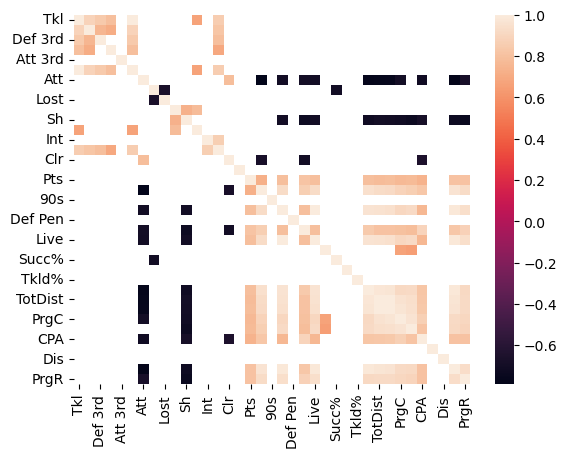

In [23]:
sns.heatmap(data_pressing_possession_corr)


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Merging Injury data with pl_data and repeat the same to take relevant correlated columns

In [24]:
merged_df = pd.merge(pl_data, pl_injury, on=['Season', 'Squad'])

In [25]:
merged_df

,Squad,Rk,MP,W,D,L,GF,GA,GD,Pts,...,Fld.2,Int.1,TklW.1,OG.1,Recov,Won,Lost.1,Won%,Last 5,Games_injured
0,Chelsea,1,38,29,8,1,72,15,57,95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,463
1,Arsenal,2,38,25,8,5,87,36,51,83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,618
2,Manchester Utd,3,38,22,11,5,58,26,32,77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,728
3,Everton,4,38,18,7,13,45,46,-1,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281
4,Liverpool,5,38,17,7,14,52,41,11,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Everton,16,32,9,8,15,32,48,-16,29,...,294.0,312.0,370.0,3.0,1677.0,577.0,491.0,54.0,L L D W L,227
396,Nott'ham Forest,17,33,7,9,17,42,58,-16,26,...,322.0,283.0,364.0,2.0,1551.0,513.0,488.0,51.2,D D W L D,371
397,Luton Town,18,33,6,7,20,46,70,-24,25,...,385.0,291.0,319.0,4.0,1664.0,560.0,551.0,50.4,D L L W L,373
398,Burnley,19,33,4,8,21,33,68,-35,20,...,316.0,234.0,298.0,3.0,1482.0,501.0,635.0,44.1,W D D L D,323


Some feature have too many Nan values. This is beacuse some metrics were not being recorded or calculated as the emergence of data analysis in sports is a recent advancement. 

As the number of nan values points are alot we cannot just drop them and adding 0 or mean value will just skew the data. So we will just use feature which does not have nan values.

In [26]:
df_no_nan = merged_df[merged_df.columns[merged_df.isna().sum() == 0]]

# Display the columns with no NaN values
print("Columns with no NaN values:")
print(len(df_no_nan.columns))

Columns with no NaN values:
59


In [27]:
clean_data = df_no_nan.copy()

In [28]:
clean_data["Season"]=clean_data["Season"].astype(int)
clean_data.drop(columns=["Top Team Scorer", "Goalkeeper"], inplace=True)
# clean_data = pd.get_dummies(clean_data, columns=['Squad'])
clean_data.set_index('Squad')
clean_data.head()

,Squad,Rk,MP,W,D,L,GF,GA,GD,Pts,...,SoT,SoT/90,G/SoT,PK.1,PKatt.2,# Pl.3,90s.3,Fls,Season,Games_injured
0,Chelsea,1,38,29,8,1,72,15,57,95,...,310,8.16,0.21,5,6,30,38.0,479,2004,463
1,Arsenal,2,38,25,8,5,87,36,51,83,...,301,7.92,0.28,3,4,25,38.0,441,2004,618
2,Manchester Utd,3,38,22,11,5,58,26,32,77,...,337,8.87,0.16,3,4,26,38.0,477,2004,728
3,Everton,4,38,18,7,13,45,46,-1,61,...,173,4.55,0.25,2,3,22,38.0,508,2004,281
4,Liverpool,5,38,17,7,14,52,41,11,58,...,245,6.45,0.19,3,5,29,38.0,430,2004,680


Mapping the squads to convert names to numbers

In [29]:
squads = clean_data['Squad'].unique()

squad_mapping = {squad: idx + 1 for idx, squad in enumerate(squads)}

print(squad_mapping)

{'Chelsea': 1, 'Arsenal': 2, 'Manchester Utd': 3, 'Everton': 4, 'Liverpool': 5, 'Bolton': 6, 'Middlesbrough': 7, 'Manchester City': 8, 'Tottenham': 9, 'Aston Villa': 10, 'Charlton Ath': 11, 'Birmingham City': 12, 'Fulham': 13, 'Newcastle Utd': 14, 'Blackburn': 15, 'Portsmouth': 16, 'West Brom': 17, 'Crystal Palace': 18, 'Norwich City': 19, 'Southampton': 20, 'West Ham': 21, 'Wigan Athletic': 22, 'Sunderland': 23, 'Reading': 24, 'Sheffield Utd': 25, 'Watford': 26, 'Derby County': 27, 'Stoke City': 28, 'Hull City': 29, 'Wolves': 30, 'Burnley': 31, 'Blackpool': 32, 'Swansea City': 33, 'QPR': 34, 'Cardiff City': 35, 'Leicester City': 36, 'Bournemouth': 37, 'Brighton': 38, 'Huddersfield': 39, 'Leeds United': 40, 'Brentford': 41, "Nott'ham Forest": 42, 'Luton Town': 43}


In [30]:
clean_data['Squad'] = clean_data['Squad'].map(squad_mapping)

Dropping `G-PK` and `PK` as they are the totals for the season and we are calculating the average for each game

In [31]:
clean_data.drop(['G-PK', 'PK'], axis=1, inplace=True)


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Prediction of Injury and average goals per game using the pressing and possession data

Split the dataset

In [32]:
X = clean_data.drop(['Games_injured', 'G-PK.1'], axis=1)  # Features
y_injuries = clean_data['Games_injured']  # Predicting number of injuries
y_gpg = clean_data['G-PK.1']     # Predicting team goals per game

# Split data into training and testing sets
X_train, X_test, y_train_injuries, y_test_injuries = train_test_split(X, y_injuries, test_size=0.2, random_state=42)
X_train, X_test, y_train_gpg, y_test_gpg = train_test_split(X, y_gpg, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### PCA for Dimensionality Reduction

In [33]:
pca = PCA(n_components=0.95)  # retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [34]:
explained_var_pca = pca.explained_variance_ratio_

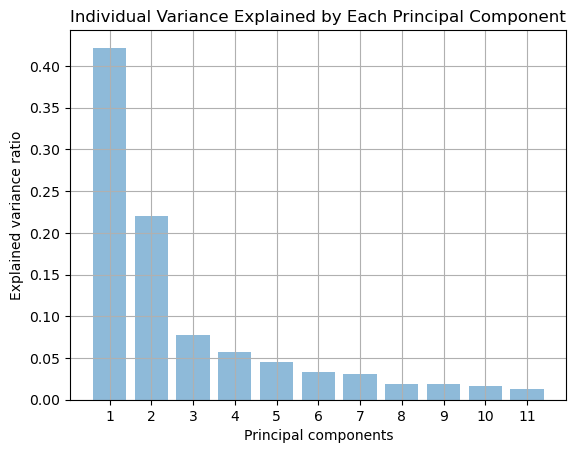

In [35]:
plt.figure()
plt.bar(range(1, len(explained_var_pca) + 1), explained_var_pca, alpha=0.5, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(range(1, len(explained_var_pca) + 1))
plt.title('Individual Variance Explained by Each Principal Component')
plt.grid(True)
plt.show()

In [36]:
X_train_Df = pd.DataFrame(data = X_train_pca)

In [37]:
X_train_Df

,0,1,2,3,4,5,6,7,8,9,10
0,0.925696,-1.254695,2.194192,-1.158661,-1.061930,-3.043893,0.159245,0.562933,-0.705069,0.001021,1.623828
1,-5.057190,-1.516919,1.895776,1.315445,1.846908,-2.187292,3.669367,-0.227732,0.239628,0.127414,0.372893
2,6.321079,-0.457783,-0.185500,1.461367,0.317901,1.776533,-0.678497,-0.050599,-0.125738,0.599556,0.841576
3,-1.953274,-0.349083,-1.318673,0.615770,-0.611807,0.622075,0.100911,0.899019,0.774001,-0.422886,0.887515
4,-3.229984,-0.535391,-1.099898,-3.791653,2.121450,0.166736,-0.019106,0.007841,0.385296,-0.612553,0.002894
...,...,...,...,...,...,...,...,...,...,...,...
315,-2.870707,-1.236246,1.657849,1.393160,0.965615,-1.340698,1.398397,-0.069758,1.134503,0.047882,1.081414
316,3.407431,-1.041028,1.628591,0.103159,-1.452000,0.627399,-1.399624,0.749173,0.623182,-1.351061,-1.072098
317,-1.484117,-0.406900,-1.953483,-1.055527,3.615236,0.808614,-1.050454,0.216854,0.364926,-0.107514,0.428636
318,-0.548737,-0.469114,-0.618598,-3.578816,1.571228,2.242211,-0.156934,-0.456586,0.568357,0.594144,-0.741796


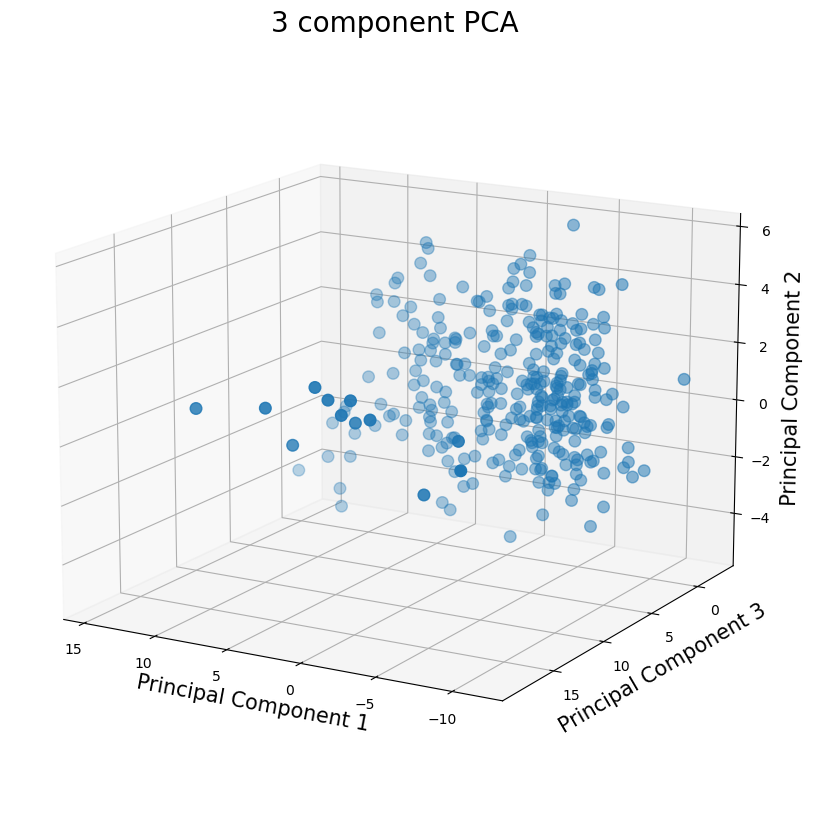

In [38]:
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1,  projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_zlabel('Principal Component 2', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

# targetsName = ['MALE', 'FEMALE']

# targets = list(df['Property Class'].unique())
# colors = ['orange', 'g', 'blue']
# colors = ['#FFA500', '#90EE90', '#006400', '#87CEEB', '#4169E1', '#000080', '#40E0D0']

ax.scatter(  X_train_Df.loc[:,0]
               , X_train_Df.loc[:,1]
               , X_train_Df.loc[:,2]
               , s = 70)

ax.grid()
ax.view_init(15, 120)  # ax.view_init(elev, azim)

#### Linear Regression

In [39]:
def train_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = root_mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    max_err = max_error(y_test, predictions)
    explained_var = explained_variance_score(y_test, predictions)
    print(f"RMSE: {mse}, Max error:{max_err}\n")

In [40]:
# Linear Regression for injuries
print("\nLinear Regression for Injuries:")
train_evaluate(LinearRegression(), X_train_pca, y_train_injuries, X_test_pca, y_test_injuries)

# Linear Regression for team rank
print("Linear Regression for Goals per game:")
train_evaluate(LinearRegression(), X_train_pca, y_train_gpg, X_test_pca, y_test_gpg)



Linear Regression for Injuries:
RMSE: 98.72272661662329, Max error:425.9771410215904

Linear Regression for Goals per game:
RMSE: 0.05400044524555812, Max error:0.15627146954239157



#### SVM

In [41]:
# SVM for injuries
print("SVM Regression for Injuries:")
train_evaluate(SVR(), X_train_pca, y_train_injuries, X_test_pca, y_test_injuries)

# SVM for team rank
print("SVM Regression for Goals per game:")
train_evaluate(SVR(), X_train_pca, y_train_gpg, X_test_pca, y_test_gpg)


SVM Regression for Injuries:
RMSE: 106.10123639062792, Max error:390.53669701252085

SVM Regression for Goals per game:
RMSE: 0.09490783766507511, Max error:0.29006385883289365



#### Random Forest

In [42]:
# Random Forest for injuries
print("Random Forest Regression for Injuries:")
train_evaluate(RandomForestRegressor(n_estimators=100, random_state=42), X_train_pca, y_train_injuries, X_test_pca, y_test_injuries)

# Random Forest for team rank
print("Random Forest Regression for Goals per game:")
train_evaluate(RandomForestRegressor(n_estimators=100, random_state=42), X_train_pca, y_train_gpg, X_test_pca, y_test_gpg)


Random Forest Regression for Injuries:
RMSE: 100.02411296782391, Max error:407.8

Random Forest Regression for Goals per game:
RMSE: 0.11599740568219619, Max error:0.3645000000000007



#### Decision Tree

In [43]:
# Decision Tree for injuries
print("Decision Tree Regression for Injuries:")
train_evaluate(DecisionTreeRegressor(random_state=42), X_train_pca, y_train_injuries, X_test_pca, y_test_injuries)

# Poisson Regression for team rank
print("Poisson Regression for Goals per game:")
train_evaluate(DecisionTreeRegressor(random_state=42), X_train_pca, y_train_gpg, X_test_pca, y_test_gpg)

Decision Tree Regression for Injuries:
RMSE: 155.03600388296906, Max error:513.0

Poisson Regression for Goals per game:
RMSE: 0.1663392617513977, Max error:0.5800000000000001



#### Poisson Regression

In [44]:
# Poisson Regression for injuries
print("Poisson Regression for Injuries:")
train_evaluate(PoissonRegressor(), X_train_pca, y_train_injuries, X_test_pca, y_test_injuries)

# Poisson Regression for team rank
print("Poisson Regression for Goals per game:")
train_evaluate(PoissonRegressor(), X_train_pca, y_train_gpg, X_test_pca, y_test_gpg)

Poisson Regression for Injuries:
RMSE: 98.3597257986138, Max error:422.8112274634432

Poisson Regression for Goals per game:
RMSE: 0.0794819756794161, Max error:0.2635880480647159

